# Anomaly Detection for Time Series Data

<br />

I am going to do outlier detections for prices data of Bitcoin by KNN.

<br />

"仮想通貨(暗号通貨)４本値CSVゲッター from Cryptowatch"


http://nipper.work/btc/index.php?market=bitFlyer&coin=BTCJPY&periods=86400&after=1420070400

In [1]:
from statistics import mean, variance

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.neighbors import NearestNeighbors

In [2]:
# Read the data

data = pd.read_csv("btc.csv", encoding="shift-jis", header=None)

In [3]:
# Check

data.head()

,0,1,2,3,4,5
0,2016-12-30 00:00:00,0.00769,0.00875,0.00769,0.00845,7870.4500
1,2016-12-31 00:00:00,0.00850,0.00891,0.00842,0.00843,3269.1045
2,2017-01-01 00:00:00,0.00856,0.00864,0.00826,0.00833,3206.9350
3,2017-01-02 00:00:00,0.00838,0.00892,0.00811,0.00821,5814.5170
4,2017-01-03 00:00:00,0.00821,0.00854,0.00800,0.00850,690.7145


In [4]:
data.shape

(366, 6)

- Explanations of the columns


    - 0: Date and time
    
    - 1: Opening price
    
    - 2: Highest price
    
    - 3: Lowest price
    
    - 4: Closing price
    
    - 5: Volume

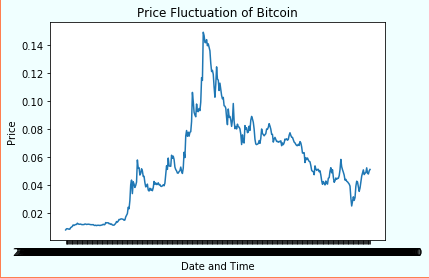

In [5]:
# Visualize the data

plt.figure(facecolor="azure", edgecolor="coral", linewidth=2)

plt.plot(data.iloc[:, 0], data.iloc[:, 1])

plt.title("Price Fluctuation of Bitcoin")
plt.xlabel("Date and Time")
plt.ylabel("Price")
plt.show()

## [Task 1] Hotelling's T-Squared Distribution

<br />

The following is a flow of anomaly detections by using Hotelling's T-squared distribution.


1. Decide an anomalous incidence rate(false detection rate), $\alpha$.


2. Let a probability density Chi-square distribution where degree of freedom is $M$ and the scale factor is $1$, and decide a threshold $a_{th}$.


3. Compute sample mean and sample variance.


4. Compute Mahalanobis distance by using the score already computed.


5. Let the condition anomalous if the value computed on the previous step is more than $a_{th}$.

In [9]:
# Get the data of opening prices

target_data = data.iloc[:, 1:2].values

opening_prices = []
for i in range(len(target_data)):
    opening_prices.append(target_data[i, 0])

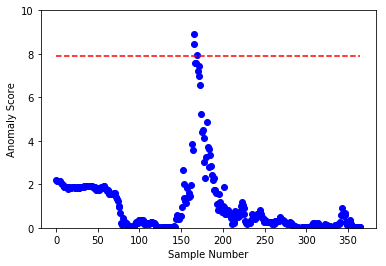

In [11]:
# Compute sample mean
sample_mean = mean(opening_prices)

# Compute sample variance
sample_variance = variance(opening_prices)

# Compute the degree of abnormality
scores = []
for x in opening_prices:
    mahalanobis_dis = (x-sample_mean)**2 / sample_variance
    scores.append(mahalanobis_dis)

# Set the 1-level threshold by Chi-square distribution
threshold = stats.chi2.interval(0.99, 1)[1]

# Plot the results
plt.plot(scores, "o", color="b")
plt.plot([0, 365], [threshold, threshold], "k-", color="r", ls="dashed")
plt.xlabel("Sample Number")
plt.ylabel("Anomaly Score")
plt.ylim([0, 10])
plt.show()

In [12]:
# Create a list for dates that anomalous values are detected

over = filter(lambda x: x > threshold, scores)
over_list = list(over)
[scores.index(i) for i in over_list]

[165, 166, 169]